In [27]:
import time
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf  


np.random.seed(1)

In [28]:
# Load and preprocess the data
data = []  # List to store image data
labels = []  # List to store labels

# Define a function to extract the person label from the file name
def extract_person_label(file_name):
    return int(file_name.split('.')[0].replace('subject', '')) - 1  # Subtract 1 to make labels start from 0

# Load data and labels
# Assuming the dataset files are in the 'dataset' directory
dataset_dir = 'D:/University/Semester 7/Deep Learning/Assignments/01/Question 1 & 2/Archive/data'

for file_name in os.listdir(dataset_dir):
    img = plt.imread(os.path.join(dataset_dir, file_name))
    # print(img.shape)
    data.append(img.flatten())  # Flatten image into a 1D array
    labels.append(extract_person_label(file_name))

data = np.array(data)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [29]:
len(X_train),len(y_train)

(132, 132)

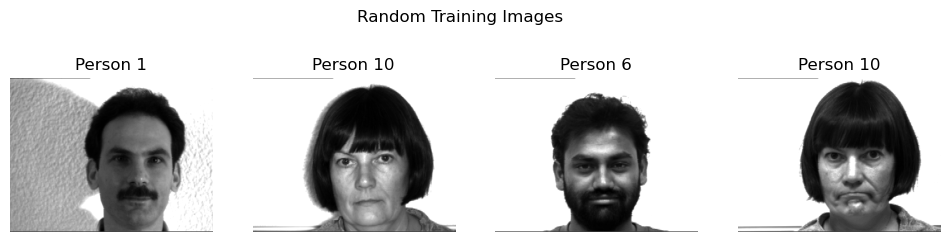

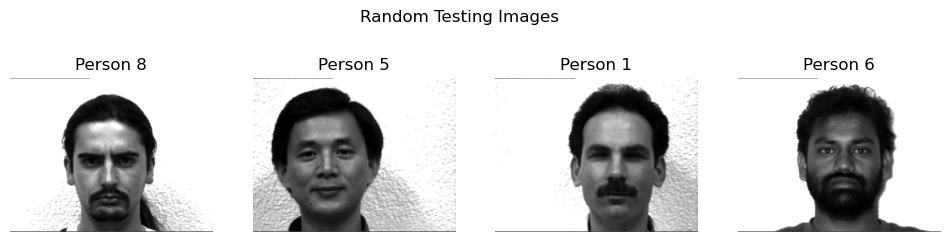

In [30]:
import random

# Randomly select four indices from the training dataset
train_indices = random.sample(range(len(X_train)), 4)

# Randomly select four indices from the testing dataset
test_indices = random.sample(range(len(X_test)), 4)

# Function to display images
def display_images(images, labels, title):
    plt.figure(figsize=(12, 3))
    plt.suptitle(title)
    for i, (image, label) in enumerate(zip(images, labels), 1):
        plt.subplot(1, 4, i)
        plt.imshow(image.reshape((243, 320)), cmap='gray')
        plt.title(f"Person {label}")
        plt.axis('off')
    plt.show()

# Display four random training images
train_images_to_display = X_train[train_indices]
train_labels_to_display = y_train[train_indices]
display_images(train_images_to_display, train_labels_to_display, "Random Training Images")

# Display four random testing images
test_images_to_display = X_test[test_indices]
test_labels_to_display = y_test[test_indices]
display_images(test_images_to_display, test_labels_to_display, "Random Testing Images")

Accuracy: 96.97%
Precision: 96.97%
Recall: 96.97%
F1-Score: 96.97%


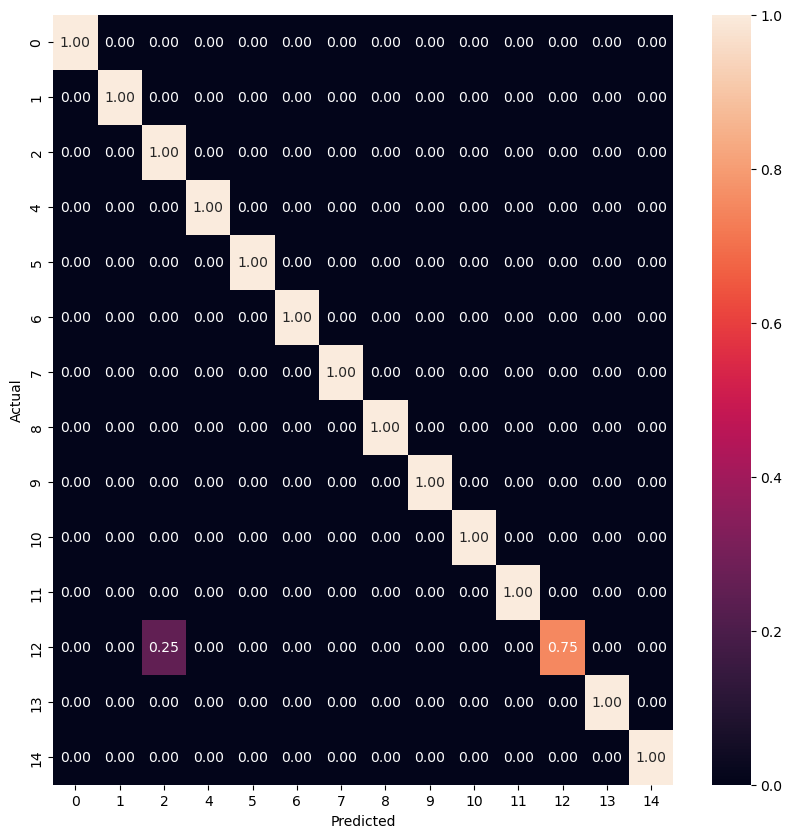

In [39]:
# sci-kit learn model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a linear SVM classifier
clf = SVC(kernel='linear')

# Train classifier
clf.fit(X_train, y_train)

# Make predictions on unseen test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate precision
precision = precision_score(y_test, y_pred, average='micro')
print(f"Precision: {precision * 100:.2f}%")

# Calculate recall
recall = recall_score(y_test, y_pred, average='micro')
print(f"Recall: {recall * 100:.2f}%")

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='micro')
print(f"F1-Score: {f1 * 100:.2f}%")

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalise confusion matrix
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create figure
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

